<a href="https://colab.research.google.com/github/JaoSaraiva/-Engenhando-com-Dados/blob/main/DL_previsao_regressao%26recorrente_keras_engjao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
passageiros = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')

In [ ]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [ ]:
import seaborn as sns
import matplotlib as mpl

In [ ]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

<Axes: xlabel='tempo', ylabel='passageiros'>

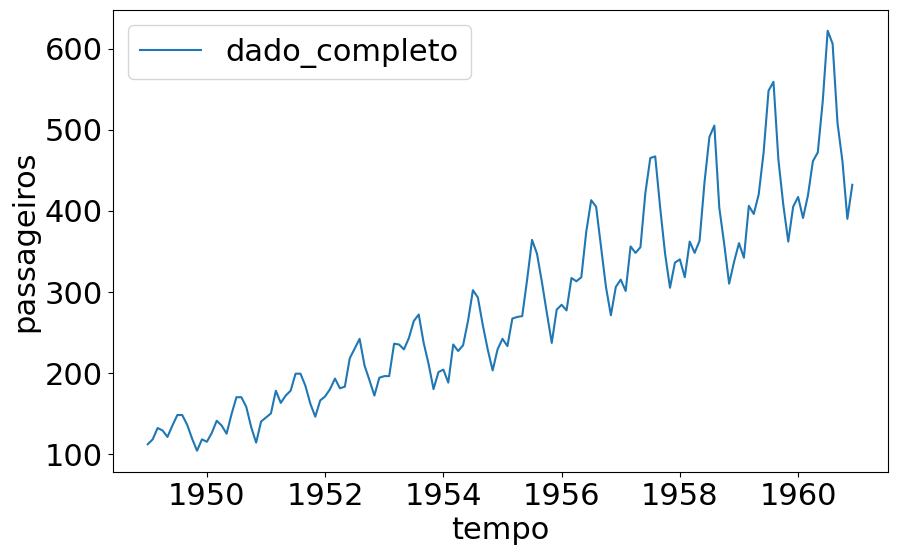

In [ ]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')

Exemplo de dados de série temporal. Vamos passar as informações para a rede neural para prever quantos passageiros terá no futuro.

#Escalando os dados
fazemos para que os dados fiquem mais próximos de zero e a máquina tenha a maior facilidade de compreensão.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc= StandardScaler()

In [ ]:
sc.fit(passageiros)

StandardScaler()

In [ ]:
dado_escalado = sc.transform(passageiros)

In [ ]:
#x input, y output
x = dado_escalado[:,0]
y = dado_escalado[:,1]

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

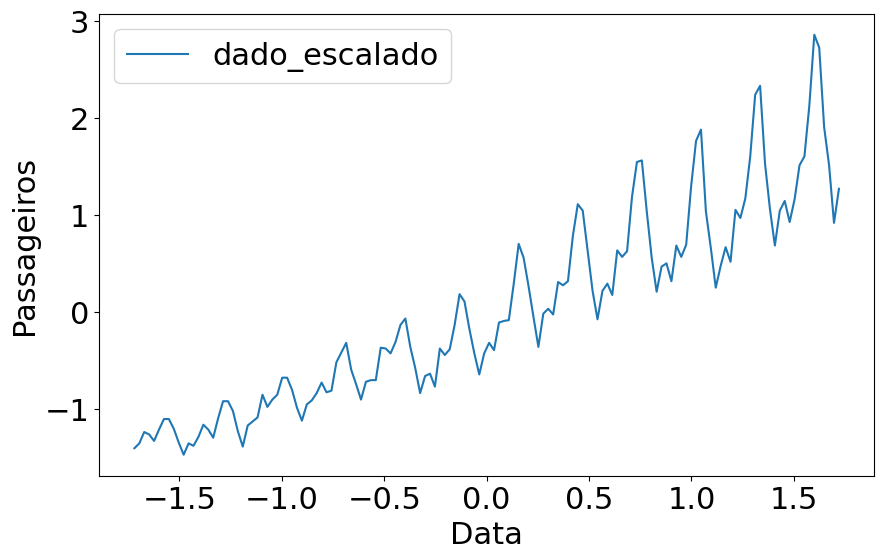

In [ ]:
sns.lineplot(x=x, y=y, label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

#Passando as informações para a rede: Treino e Teste

In [ ]:
tamanho_treino = int(len(x)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [ ]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [ ]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

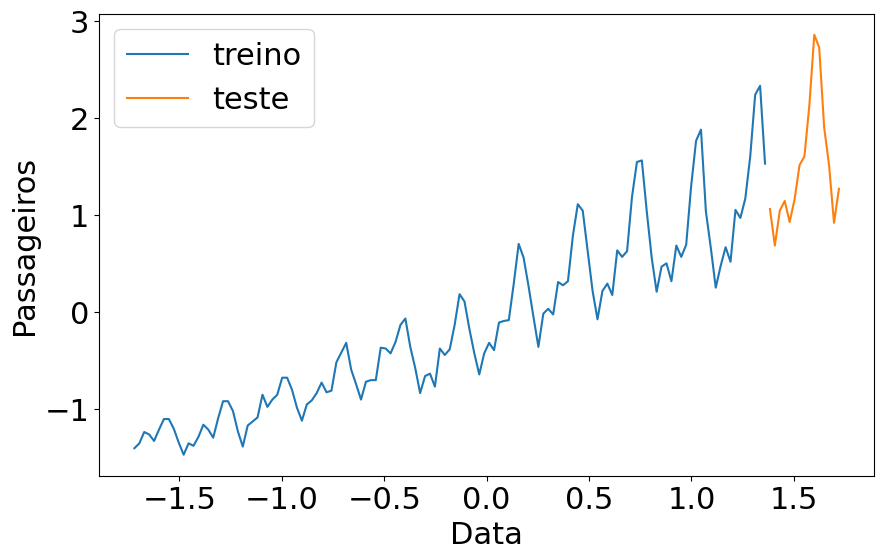

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

Vamos ensinar a rede neural a fazer esta previsão que está em laranja passando uma série de dados para ela. Há uma quebra na linha pq geramos 2 gráficos separados.

#Regressão Linear

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False))

In [ ]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

Rede neural feita. Agora vamos verificar quantos parâmetros temos nela.

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Foi identificado 2 parâmetros: peso W e b bias quando o 'use_bias=True'. Quando o 'use_bias=False' identifica-se 1 parâmetro. Podemos otimizá-los para tentar ajustar nossa reta e tentar levar o mais próximo possível os valores de data aos números de passageiros. Vamos fazer isso com os dados de treino:

In [ ]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 0s 4ms/step - loss: 0.1284


In [ ]:
y_predict = regressor.predict(xtreino)

5/5 [==============================] - 0s 2ms/step


<Axes: >

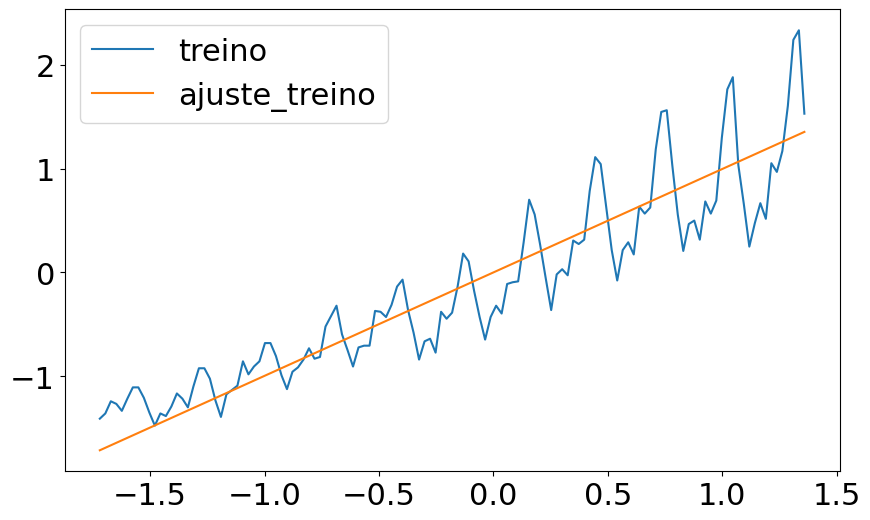

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

#Mudando novamente a escala para retornar a original.

In [ ]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}

In [ ]:
resultados = pd.DataFrame(data=d)

In [ ]:
resultados

,tempo,passageiros
0,-1.720064,-1.712176
1,-1.696007,-1.688229
2,-1.671950,-1.664283
3,-1.647894,-1.640336
4,-1.623837,-1.616390
...,...,...
124,1.262984,1.257192
125,1.287041,1.281139
126,1.311098,1.305085
127,1.335155,1.329031


In [ ]:
resultado_transf = sc.inverse_transform(resultados)

In [ ]:
resultado_transf = pd.DataFrame(resultado_transf)

In [ ]:
resultado_transf.columns = ['tempo', 'passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

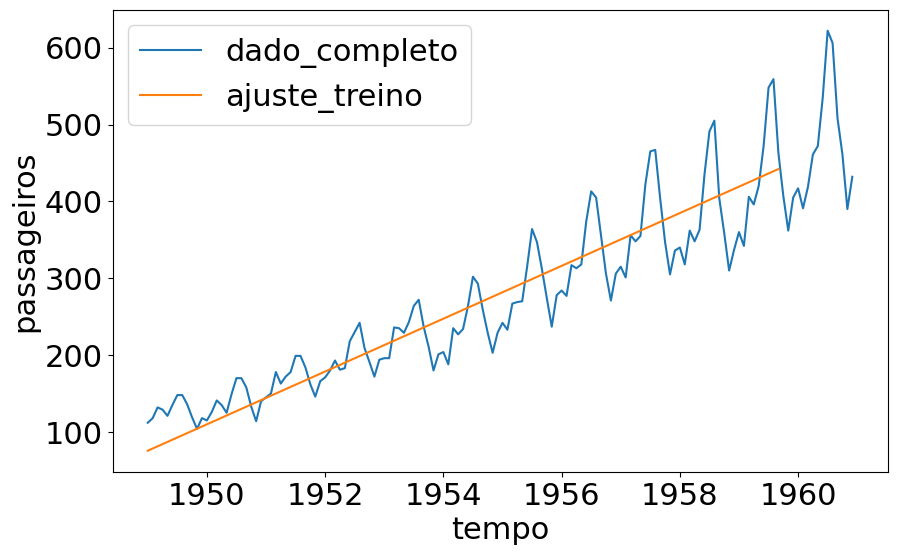

In [ ]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')

Queremos ver os dados após o final da reta laranja. Queremos que seja uma reta tmb. Vamos verificar:

In [ ]:
y_predict_teste = regressor.predict(xteste)

1/1 [==============================] - 0s 21ms/step


In [ ]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [ ]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [ ]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)

In [ ]:
resultado_transf_teste.columns = ['tempo', 'passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

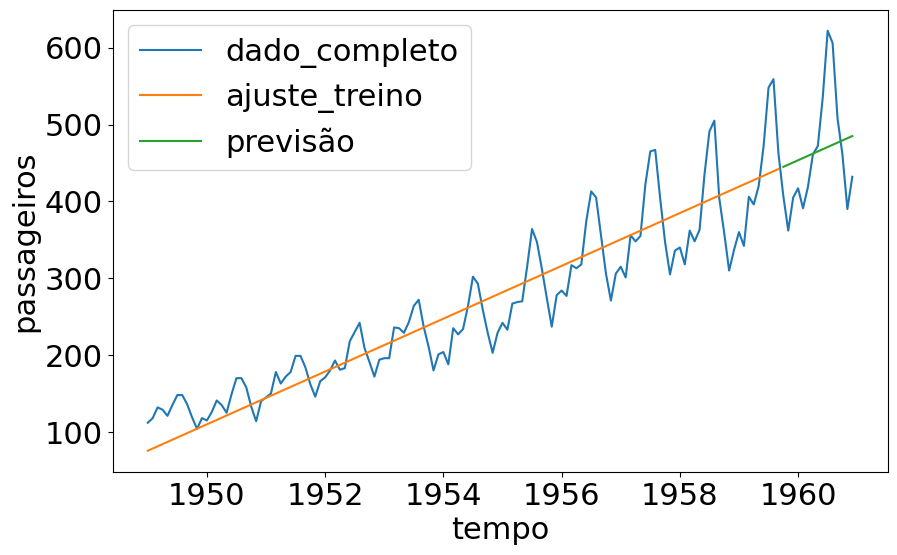

In [ ]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsão')

#Criando uma nova rede neural com camadas para ajustar mais ainda à reta:

In [ ]:
regressor2 = Sequential()

In [ ]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

Compilando a rede

In [ ]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
regressor2.fit(xtreino, ytreino, epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 3ms/step - loss: 0.8095
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8091
Epoch 3/200
5/5 [==============================] - 0s 5ms/step - loss: 0.8084
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8075
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8060
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8038
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8007
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7965
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7910
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7842
Epoch 11/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7751
Epoch 12/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7641
Epoch 13/200
5/5 [==============================] - 0s 4ms/st

In [ ]:
y_predict = regressor2.predict(xtreino)

5/5 [==============================] - 0s 3ms/step


In [ ]:
y_predict_teste = regressor2.predict(xteste)

1/1 [==============================] - 0s 25ms/step


<Axes: >

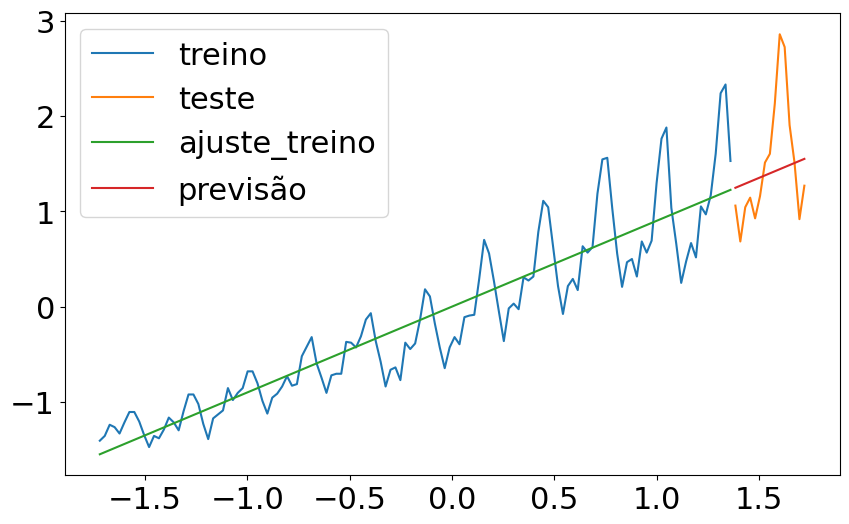

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão')

#Até o momento passamos o tempo como sendo entrada do problema e o número de passageiros como sendo a saída. Mas, pensando de outra forma, podemos utilizar o número de passageiros sendo tanto a entrada quanto a saída do problema. A diferença na entrada é que o número de passageiros possue um atraso em relação à saída. Digamos que a empresa quer saber o número de passageiros do ano seguinte, então entramos com o número de passageiros do ano vigente e saímos com o número de passageiros do ano seguinte. Então, vamos ensinar à rede esta estrutura.

In [ ]:
vetor = pd.DataFrame(ytreino)[0]

In [ ]:
import numpy as np

In [ ]:
#criando uma função que crie esse atraso dos números dos passageiros. #vetor é o vetor de número de passageiros e o n_passos vai ser o atraso do vetor de número de passageiros
def separa_dados(vetor, n_passos):
  '''
  Entrada: vetor: número de passageiros
           n_passos: número de passos no regressor/atraso
  Saída:
         X_novo: Array 2D
         y_novo: Array 1D - Nosso alvo
  '''
  X_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
       X_novo.append(list(vetor.loc[i-n_passos:i - 1]))
       y_novo.append(vetor.loc[i])

  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo


In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [ ]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [ ]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

Observamos que os números nos arrays se repetem. Com exceção do primeiro por conta do atraso 1 pois está sendo utilizado para estimar um valor de saída.

In [ ]:
vetor2 = pd.DataFrame(yteste)[0]

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2, 1)

Prontinho, dados estruturados. Vamos partir para a criação de uma nova rede neural.

In [ ]:
regressor3 = Sequential()

In [ ]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [ ]:
#compilando a rede
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
#fazendo o ajuste da rede/treinando
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8733
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7972
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7498
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7305
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7160
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7021
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6823
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6607
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6375
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6116
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5843
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5550
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

In [ ]:
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 [==============================] - 0s 4ms/step


<Axes: xlabel='tempo', ylabel='0'>

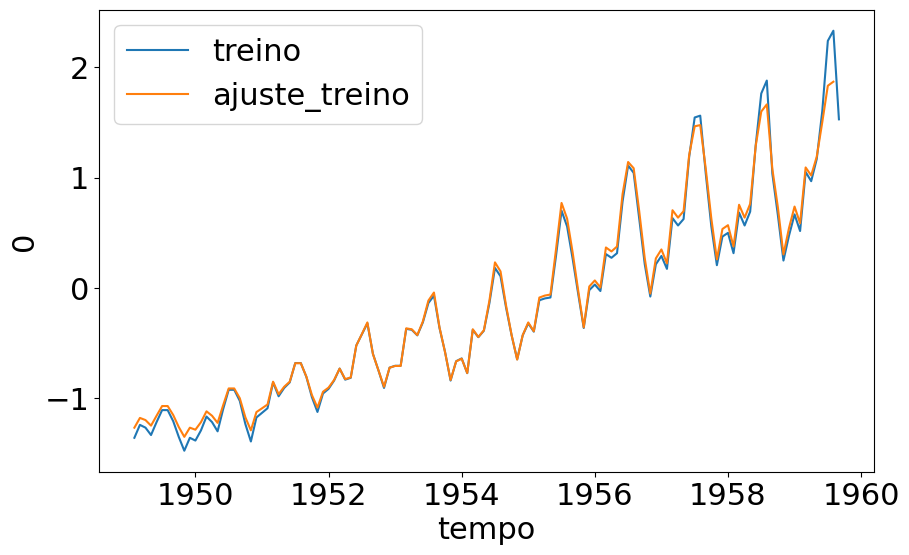

In [ ]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')

In [ ]:
#fazendo a predição dos dados de teste ou dados do futuro
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 [==============================] - 0s 77ms/step


In [ ]:
resultado  = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

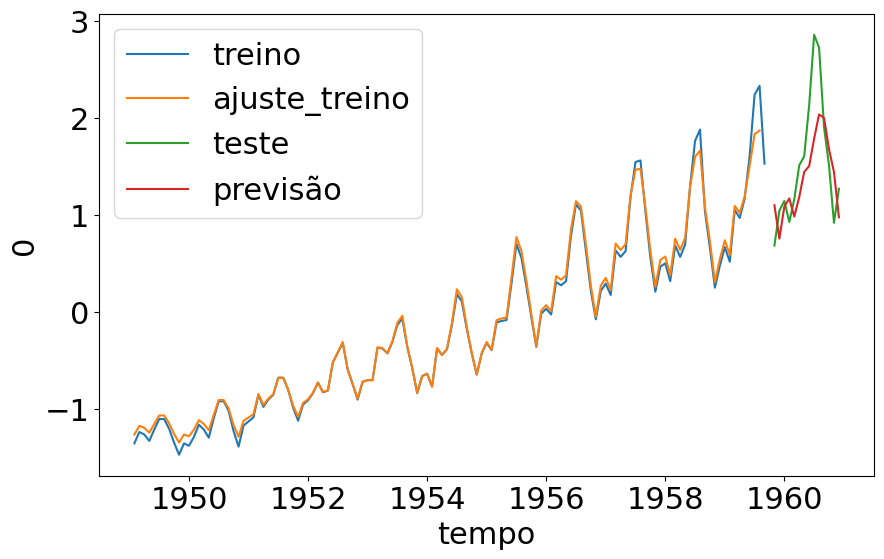

In [ ]:
sns.lineplot( x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsão')

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 4) #vamos visualizar com atraso 4. Nas anteriores fizemos com 1.

In [ ]:
xtreino_novo[0:5] #na saída vai mostrar as 4 colunas que foram determinadas por ' n_passos'

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [ ]:
ytreino_novo[0:5] #Observamos que os números nos arrays se repetem. Com exceção dos 4 primeiros por conta do atraso 4. Os 4 valores anteriores estão sendo utilizados para estimar um valor de saída

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2, 4)


Fazendo uma nova rede:

In [ ]:
regressor4 = Sequential()

In [ ]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False))
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [ ]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 4ms/step - loss: 0.7588
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6829
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 0.6194
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5570
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4930
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4339
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 0.3750
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 0.3152
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2628
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2201
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1863
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1643
Epoch 13/300
4/4 [==============================] - 0s 5ms/st

In [ ]:
y_predict_novo = regressor4.predict(xtreino_novo)

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 [==============================] - 0s 30ms/step


In [ ]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [ ]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo'>

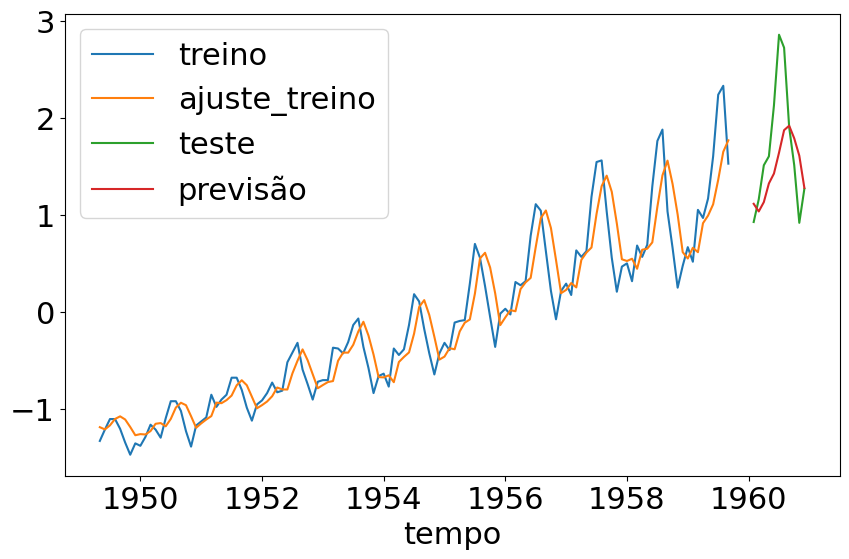

In [ ]:
sns.lineplot( x='tempo', y=ytreino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsão')

#Trabalhando com outra base de dados

In [ ]:
bike = pd.read_csv('bicicletas.csv')

In [ ]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


Nosso foco são as colunas datas e contagem. Vamos prever quantas bicicletas serão alugadas no futuro. Neste caso precisamos manipular o formato das datas.

In [ ]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

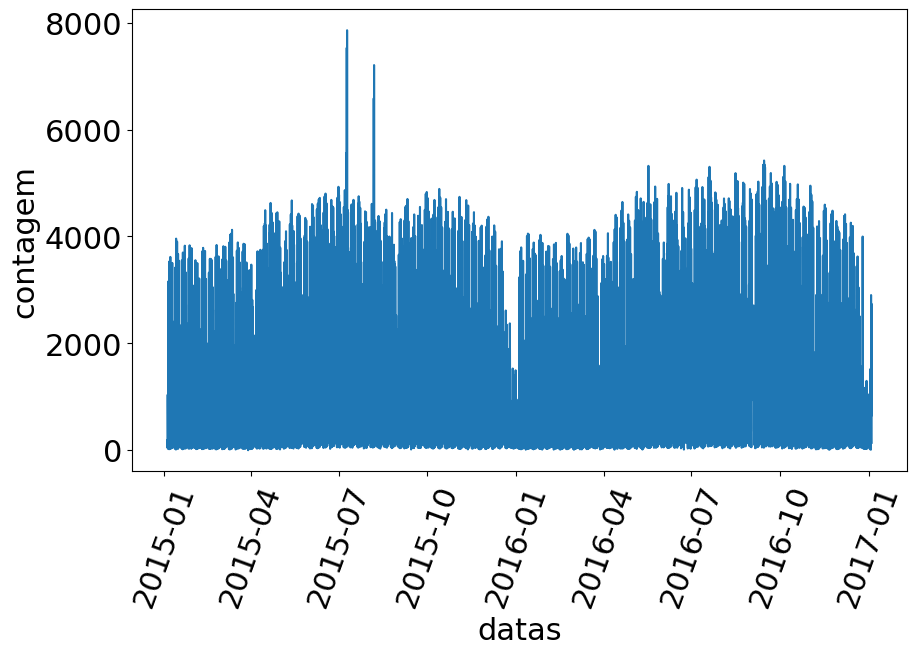

In [ ]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [ ]:
#escalonando os dados
sc2 = StandardScaler()

In [ ]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [ ]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [ ]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [ ]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

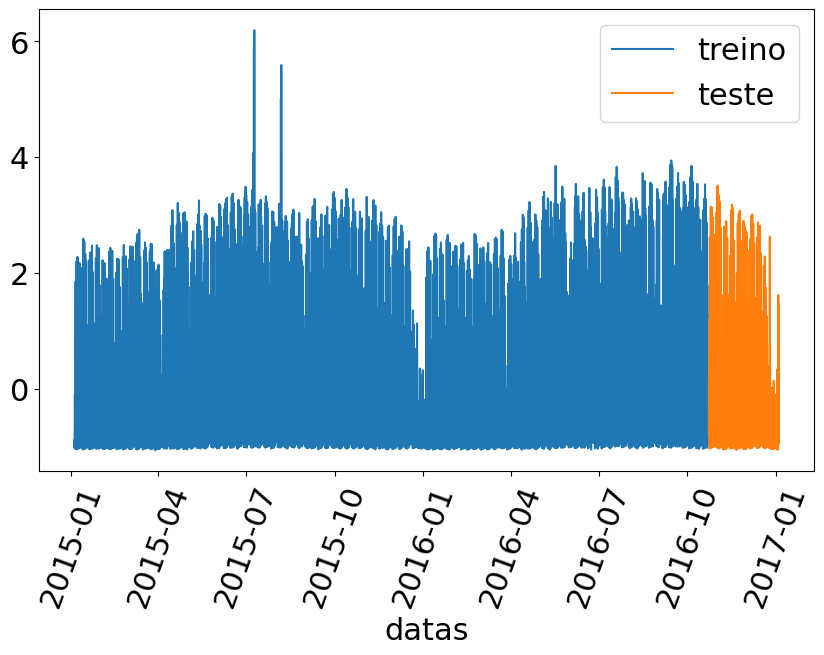

In [ ]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
plt.xticks(rotation=70)

In [ ]:
vetor = pd.DataFrame(ytreino)[0]

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

In [ ]:
xtreino_novo
#tem 10 valores por linha como solicitado acima

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [ ]:
vetor2 = pd.DataFrame(yteste)[0]

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2, 10)

Nos dados anteriores, aplicamos em uma rede neural com regressão linear.
Nestes dados da bike vamos utilizar outro método que é : Redes Neurais Recorrentes. Ela também serve para resolvermos esses tipos de problemas que são de apenas 1 tipo de dado saída e entrada. As redes recorrentes são usadas nos modelos de linguagens, se vc ler uma sequência de palavras você tem ideia de qual será  a palavra seguinte. Um looping pode indicar a recorrência.

In [ ]:
#vamos passar os dados na forma que a rede recorrente espera receber que é uma matriz tridimensional quase idêntica a gerada pela separa_dados, mas ela tem
#essa terceira dimensão que é o número de atributos por passo no tempo. No nosso caso vai ser apenas 1 atributo que é o tempo.
xtreino_novo = xtreino_novo.reshape( (xtreino_novo.shape[0], xtreino_novo.shape[1], 1))

In [ ]:
xteste_novo = xteste_novo.reshape( (xteste_novo.shape[0], xteste_novo.shape[1], 1))

Criando a rede com apenas 2 camadas

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
recorrente = Sequential()

In [ ]:
#camada 0 entrada
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2]))) #128 LOOPINGS #LSTM memórias de longo prazo*867
#camada 1 saída
recorrente.add(Dense(units=1))

Compilando a rede

In [ ]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [ ]:
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#O otimizador RMSProp serve para tratar o problema do gradiente aumentando muito/explodindo. Se o gradiente explode a rede não consegue aprender pq não
#conseguimos estimar os pesos de forma adequada.
Agora vamos fazer o ajuste/treino da LSTM

In [ ]:
resultado = recorrente.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 13s 21ms/step - loss: 0.2629 - val_loss: 0.1226
Epoch 2/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0767 - val_loss: 0.0405
Epoch 3/100
490/490 [==============================] - 10s 21ms/step - loss: 0.0545 - val_loss: 0.0340
Epoch 4/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0477 - val_loss: 0.0280
Epoch 5/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0441 - val_loss: 0.0276
Epoch 6/100
490/490 [==============================] - 10s 21ms/step - loss: 0.0407 - val_loss: 0.0324
Epoch 7/100
490/490 [==============================] - 10s 21ms/step - loss: 0.0391 - val_loss: 0.0297
Epoch 8/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0375 - val_loss: 0.0224
Epoch 9/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0361 - val_loss: 0.0229
Epoch 10/100
490/490 [==============================] - 10s 20ms/step - loss

In [ ]:
y_ajustado = recorrente.predict(xtreino_novo)

490/490 [==============================] - 7s 12ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

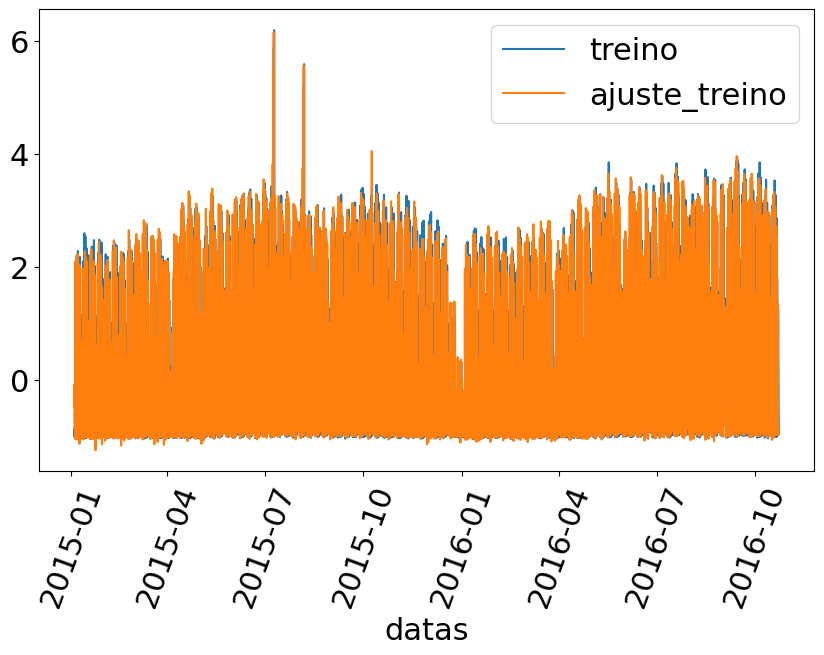

In [ ]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bike[0:15662], label='ajuste_treino')
plt.xticks(rotation=70)

In [ ]:
#fazendo predição
y_predito = recorrente.predict(xteste_novo)

55/55 [==============================] - 1s 23ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

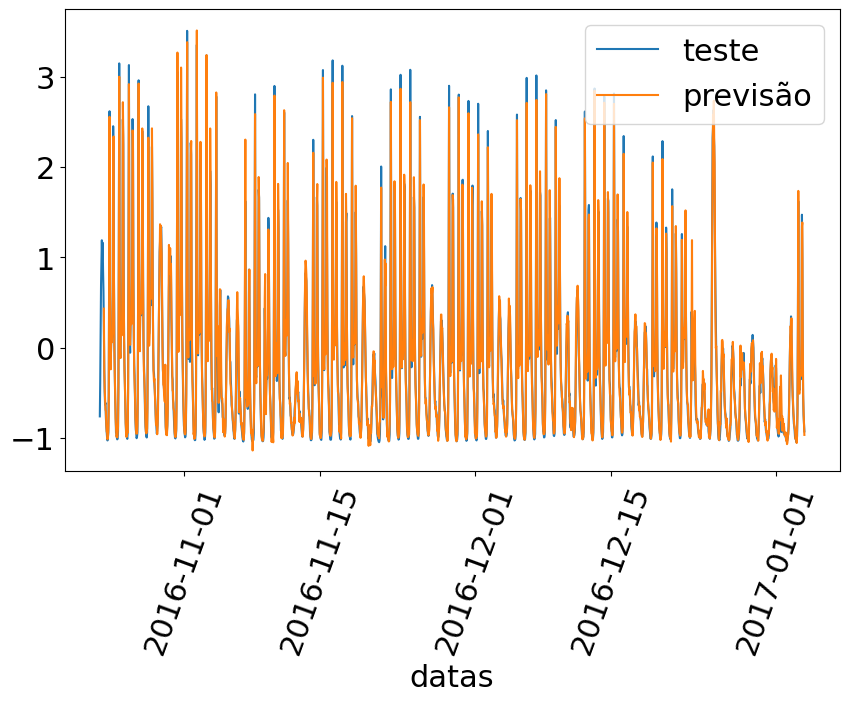

In [ ]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)], label='previsão')
plt.xticks(rotation=70)

#Utilizando a GRU: apenas testando

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
recorrente_g = Sequential()

In [ ]:
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2]))) #camada de entrada
recorrente_g.add(Dense(units=1)) #camada de saída

In [ ]:
recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')

In [ ]:
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
recorrente_g.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50433 (197.00 KB)
Trainable params: 50433 (197.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
resultado2 = recorrente_g.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 11s 16ms/step - loss: 0.2400 - val_loss: 0.0779
Epoch 2/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0736 - val_loss: 0.0462
Epoch 3/100
490/490 [==============================] - 7s 13ms/step - loss: 0.0506 - val_loss: 0.0362
Epoch 4/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0435 - val_loss: 0.0315
Epoch 5/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0397 - val_loss: 0.0237
Epoch 6/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0371 - val_loss: 0.0320
Epoch 7/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0359 - val_loss: 0.0203
Epoch 8/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0342 - val_loss: 0.0205
Epoch 9/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0329 - val_loss: 0.0214
Epoch 10/100
490/490 [==============================] - 9s 19ms/step - loss: 0.03

In [ ]:
y_predito2 = recorrente_g.predict(xteste_novo)

55/55 [==============================] - 1s 5ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

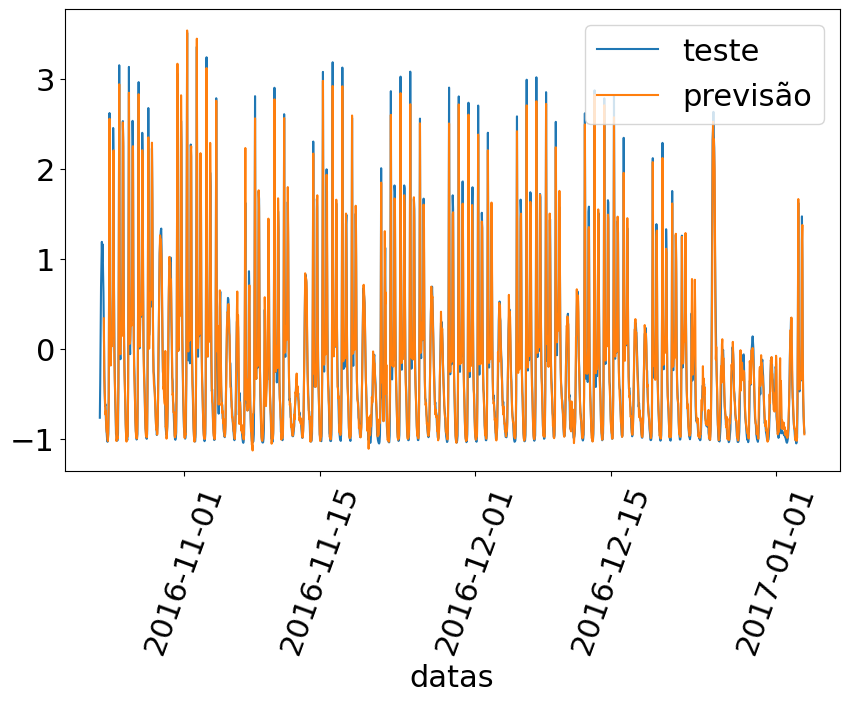

In [ ]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)], label='previsão')
plt.xticks(rotation=70)

In [ ]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


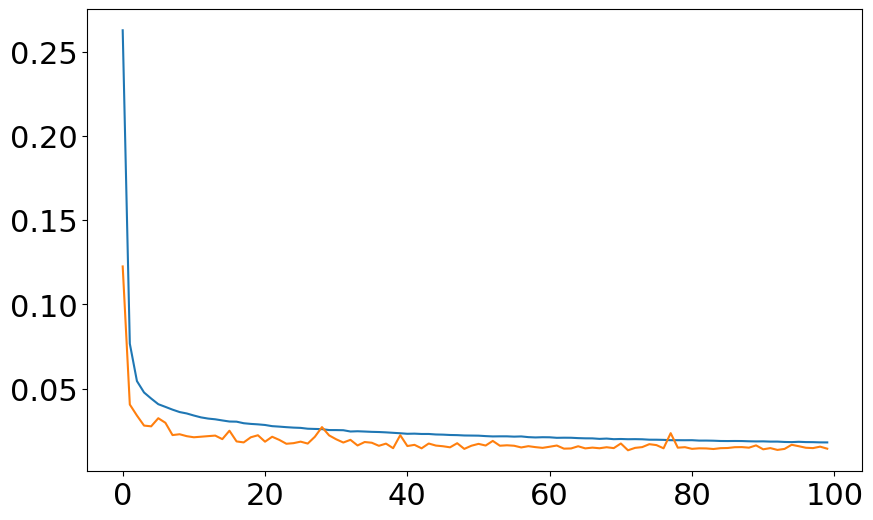

In [ ]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])

Text(0, 0.5, 'Custo')

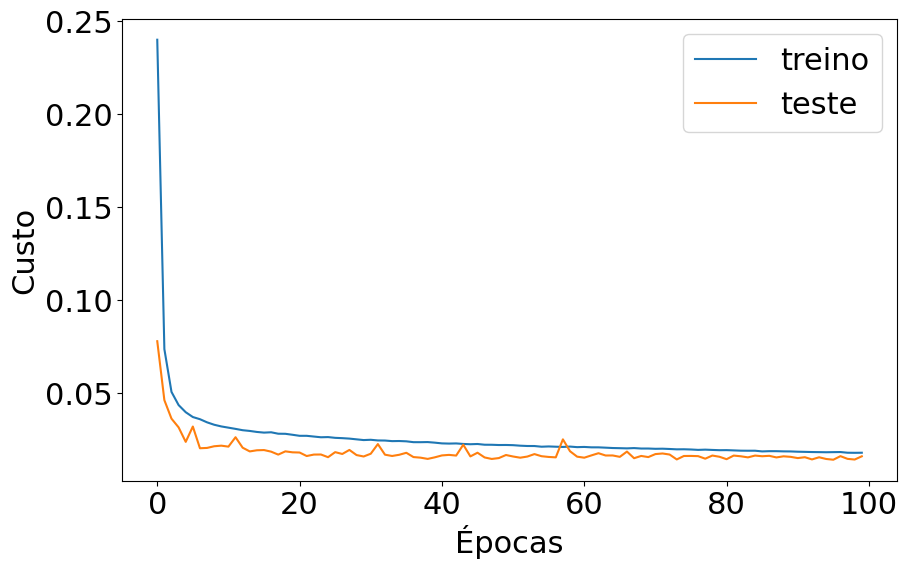

In [ ]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino', 'teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')

Concluímos que obtivemos resultados satisfatórios nos dois testes. Mas, para este caso em específico, a melhor opção é a GRU, pois é um pouco mais rápida e tem menos parâmetros para treinar.